# Section 1

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

In [22]:
# Set the seed to ensure reproducibility
np.random.seed(97654)

# Take a random sample of 25 observations from the population
sample = diabetes.sample(n=25)

# Calculate the mean and highest Glucose values of the sample
sample_mean = sample['Glucose'].mean()
sample_max = sample['Glucose'].max()

# Calculate the population mean and highest Glucose values
population_mean = diabetes['Glucose'].mean()
population_max = diabetes['Glucose'].max()

In [23]:
# Print the results
print('Sample Mean Glucose:', sample_mean)
print('Sample Maximum Glucose:', sample_max)
print('Population Mean Glucose:', population_mean)
print('Population Maximum Glucose:', population_max)

Sample Mean Glucose: 125.64
Sample Maximum Glucose: 195
Population Mean Glucose: 120.89453125
Population Maximum Glucose: 199


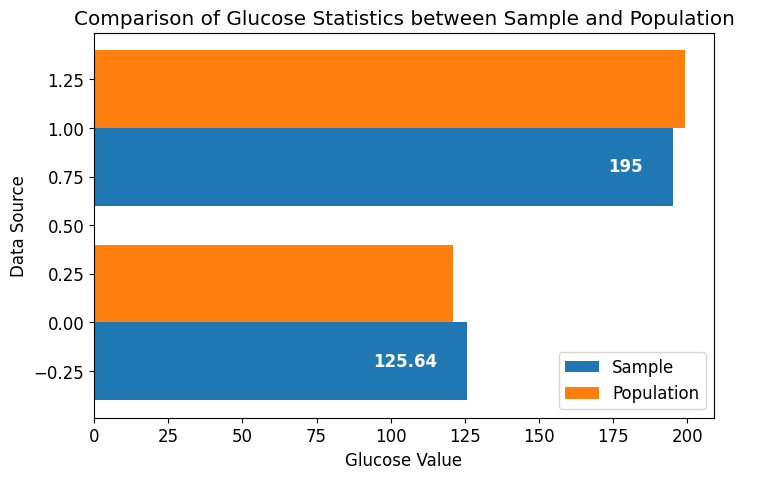

In [24]:
import numpy as np
import matplotlib.pyplot as plt



# Set figure size and font
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 12})

# Create horizontal bar chart
bar_height = 0.4
bar_positions = np.arange(2)
bar_width_sample = [sample_mean, sample_max]
bar_width_population = [population_mean, population_max]

plt.barh(bar_positions - bar_height/2, bar_width_sample, height=bar_height, label='Sample')
plt.barh(bar_positions + bar_height/2, bar_width_population, height=bar_height, label='Population')

# Set axes labels and title
plt.xlabel('Glucose Value')
plt.ylabel('Data Source')
plt.title('Comparison of Glucose Statistics between Sample and Population')

# Add value labels to the bars
for i, (x, y) in enumerate(zip(bar_width_sample, bar_positions - bar_height/2)):
    plt.text(x-10, y, str(x), color='white', fontweight='bold', ha='right', va='center')
    
for i, (x, y) in enumerate(zip(bar_width_population, bar_positions + bar_height/2)):
    plt.text(x+10, y, str(x), color='white', fontweight='bold', ha='left', va='center')

# Add legend
plt.legend(loc='best')

plt.show()


# Section 2

In [25]:
# Find the 98th percentile of BMI for the sample and population
sample_percentile = np.percentile(sample['BMI'], 98)
population_percentile = np.percentile(diabetes['BMI'], 98)

# Print the results
print('Sample 98th Percentile of BMI:', sample_percentile)
print('Population 98th Percentile of BMI:', population_percentile)


Sample 98th Percentile of BMI: 44.324
Population 98th Percentile of BMI: 47.52599999999996


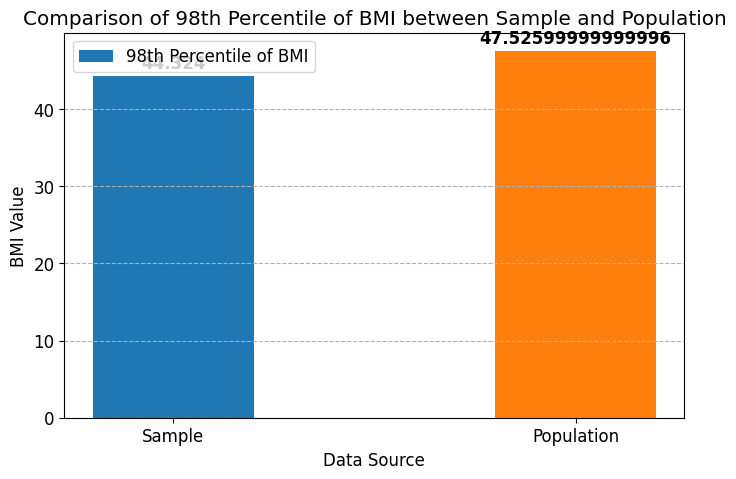

In [26]:
# Create a bar chart to compare sample and population percentiles
# Set figure size and font
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 12})

# Create vertical bar chart
bar_width = 0.4
bar_positions = np.arange(2)

plt.bar(bar_positions, [sample_percentile, population_percentile], width=bar_width, label='98th Percentile of BMI', color=['#1f77b4', '#ff7f0e'])

# Set axes labels and title
plt.xlabel('Data Source')
plt.ylabel('BMI Value')
plt.title('Comparison of 98th Percentile of BMI between Sample and Population')

# Add value labels to the bars
for i, (x, y) in enumerate(zip(bar_positions, [sample_percentile, population_percentile])):
    plt.text(x, y+1, str(y), color='black', fontweight='bold', ha='center')

# Set tick labels and positions
plt.xticks(bar_positions, ['Sample', 'Population'])

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Add legend
plt.legend(loc='best')

plt.show()



# Section 3

In [27]:
# Set the number of bootstrap samples and sample size
n_bootstrap = 500
sample_size = 150

# Create an empty list to store the bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Loop through each bootstrap sample
for i in range(n_bootstrap):
    # Take a random sample of 150 observations with replacement
    bootstrap_sample = np.random.choice(diabetes['BloodPressure'], size=sample_size, replace=True)
    
    # Calculate the mean, standard deviation, and 98th percentile of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_std = np.std(bootstrap_sample)
    bootstrap_percentile = np.percentile(bootstrap_sample, 98)
    
    # Add the bootstrap statistics to the list
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile)


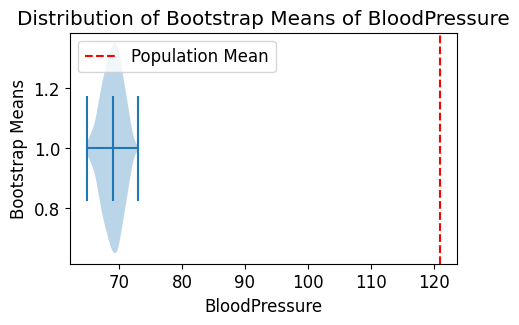

In [28]:
import seaborn as sns



# Set figure size and font
plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 12})

# Create violin plot with population mean line
plt.violinplot(bootstrap_means, vert=False, showmeans=True, widths=0.7)
plt.axvline(population_mean, color='r', linestyle='--', label='Population Mean')

# Set axes labels and title
plt.xlabel('BloodPressure')
plt.ylabel('Bootstrap Means')
plt.title('Distribution of Bootstrap Means of BloodPressure')

# Add legend
plt.legend(loc='best')

plt.show()




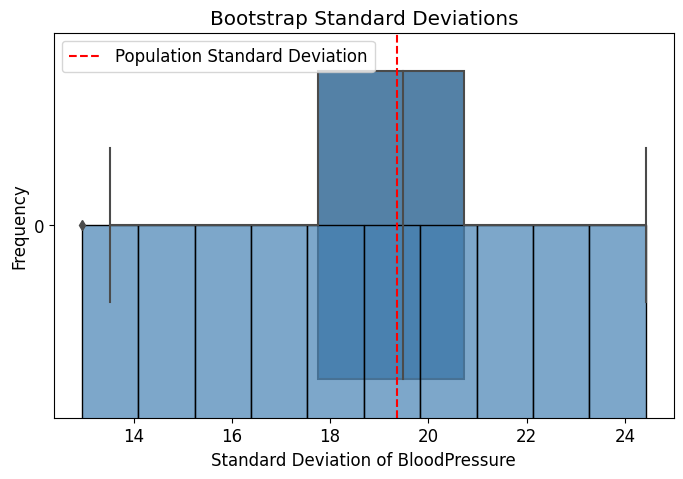

In [29]:
# Set figure size and font
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 12})

# Create subplot with histogram
sns.histplot(bootstrap_stds, bins=10, color='steelblue', alpha=0.7)
plt.axvline(diabetes['BloodPressure'].std(), color='r', linestyle='--', label='Population Standard Deviation')
plt.xlabel('Standard Deviation of BloodPressure')
plt.ylabel('Frequency')
plt.title('Bootstrap Standard Deviations')
plt.legend()

# Create subplot with boxplot
sns.boxplot(bootstrap_stds, orient='h', color='steelblue')
plt.xlabel('Standard Deviation of BloodPressure')
plt.title('Bootstrap Standard Deviations')

plt.show()



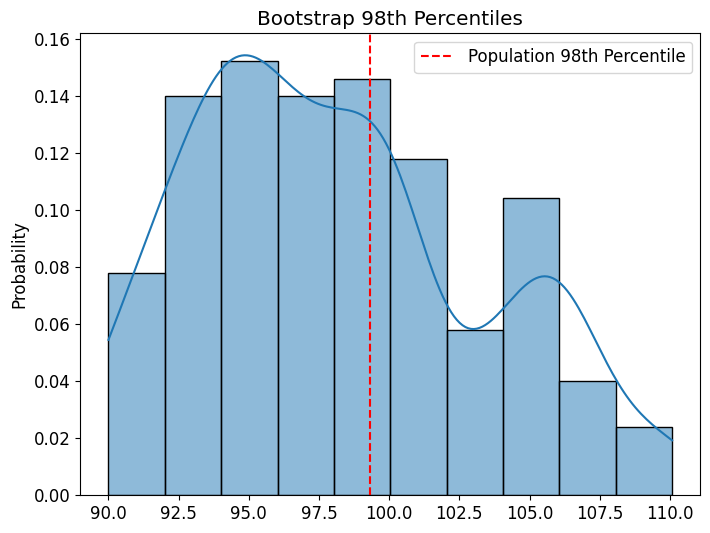

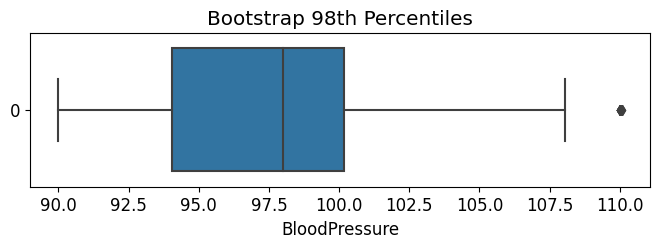

In [30]:
# Set figure size and font
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Create histogram
sns.histplot(data=bootstrap_percentiles, bins=10, alpha=0.5, stat='probability', kde=True)
plt.axvline(np.percentile(diabetes['BloodPressure'], 98), color='r', linestyle='--', label='Population 98th Percentile')
plt.legend(loc='best')
plt.title('Bootstrap 98th Percentiles')

# Create boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(data=bootstrap_percentiles, orient='h')
plt.xlabel('BloodPressure')
plt.title('Bootstrap 98th Percentiles')

plt.show()

